In [1]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [2]:
# Libraries to use
from __future__ import division 
import talib as tb
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import My own library for factor testing
import factorFilterFunctions as ff
#from config import *

In [4]:
%matplotlib inline

In [5]:
# Files to use 
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'
filenameHSOpen = 'LZ_GPA_INDXQUOTE_OPEN.csv'

In [6]:
# Constants
path = ff.data_path
timeStampNum = 1000
thresholdNum = 0.2
HSIndex='000300.SH'
sampleNum = 500

In [7]:
benchMarkClose = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5][HSIndex]
benchMarkOpen = pd.read_csv(path+filenameHSOpen,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5][HSIndex]
benchMarkClose.head()

LZ_GPA_INDXQUOTE_CLOSE-d
2013-01-17    2552.758
2013-01-18    2595.439
2013-01-21    2610.898
2013-01-22    2596.898
2013-01-23    2607.456
Name: 000300.SH, dtype: float64

In [8]:
def getSVD(inputArray,t,m):
    inputmatrix = getNewMatrix(inputArray,t,m)
    #print inputmatrix
    u,s,v = np.linalg.svd(inputmatrix)
    eviNum = 1 if s[0]/s.sum() > 0.99  else 2
    sNew = np.zeros((eviNum,eviNum))
    np.fill_diagonal(sNew,s[:eviNum])
    matrixForts = np.dot(np.dot(u[:,:eviNum].reshape(u.shape[0],eviNum),sNew),v[:eviNum])
    newts = recreateArray(matrixForts,t,m)
    return newts

In [9]:
def getNewMatrix(inputArray, t, m):
    newMatrix = []
    n = t-m+1
    for i in range(n):
        newdata = list(inputArray[i:m+i])
        newMatrix.append(newdata)
    #newMatrix = np.array(newMatrix).reshape(n,m)
    return np.array(newMatrix)

In [10]:
benchMarkOpen[-15:]

LZ_GPA_INDXQUOTE_OPEN-d
2017-02-06    3368.1081
2017-02-07    3371.7695
2017-02-08    3361.7811
2017-02-09    3381.8992
2017-02-10    3398.3173
2017-02-13    3416.9168
2017-02-14    3438.5110
2017-02-15    3435.3882
2017-02-16    3421.8299
2017-02-17    3443.6166
2017-02-20    3421.6434
2017-02-21    3475.0584
2017-02-22    3483.2008
2017-02-23    3487.5745
2017-02-24    3468.9588
Name: 000300.SH, dtype: float64

In [11]:
inputmatrix = getNewMatrix(benchMarkClose[0:sampleNum].values,sampleNum,10)
len(inputmatrix)

491

In [12]:
def calSVD(newMatrix):
    u,s,v = np.linalg.svd(newMatrix)
    return u,s,v

In [13]:
inputmatrix = getNewMatrix(benchMarkClose[0:sampleNum].values,sampleNum,10)
u,s,v=calSVD(inputmatrix)
eviNum = 1 if s[0]/s.sum() > 0.99  else 2

In [14]:
#u[:,eviNum].reshape(7,1)

In [15]:
sNew = np.zeros((eviNum,eviNum))

In [16]:
np.fill_diagonal(sNew,s[:eviNum])

In [17]:
v[:eviNum]

array([[-0.31497738, -0.31531881, -0.31562469, -0.3159016 , -0.31614643,
        -0.31641032, -0.31666023, -0.31689365, -0.3170776 , -0.31725854],
       [-0.44418133, -0.39648635, -0.31396632, -0.20418085, -0.07174745,
         0.06790613,  0.19827648,  0.31044401,  0.39761514,  0.44910028]])

In [18]:
#np.array([[1,2],[6,3]]).dot(np.array([[1,2],[2,3],[3,4]]))

In [19]:
def recreateArray(newMatrix,t,m):
    ret = []
    n = t - m +1
    for p in range(1,t+1):
        if p<m:
            alpha = p
        elif p>t-m+1:
            alpha = t-p+1
        else:
            alpha = m
        sigma = 0
        for j in range(1,m+1):
            i = p - j +1
            if i>0 and i<n+1:
                sigma += newMatrix[i-1][j-1]
        ret.append(sigma/alpha)
    return np.array(ret)

In [20]:
np.dot(u[:,:eviNum].reshape(u.shape[0],eviNum),sNew)

array([[ -8.26460725e+03,   8.00152595e+01],
       [ -8.30701824e+03,   8.58245686e+01],
       [ -8.35386977e+03,   1.25845515e+02],
       [ -8.39731551e+03,   1.60306176e+02],
       [ -8.45264019e+03,   1.81315911e+02],
       [ -8.50592447e+03,   1.89483858e+02],
       [ -8.56187077e+03,   1.59174627e+02],
       [ -8.62501113e+03,   1.11605182e+02],
       [ -8.65199363e+03,   7.13666043e+01],
       [ -8.65494097e+03,   9.89195369e+00],
       [ -8.65923710e+03,  -4.06210932e+01],
       [ -8.63488168e+03,  -1.31358920e+02],
       [ -8.58834912e+03,  -1.91922574e+02],
       [ -8.54301558e+03,  -2.29551821e+02],
       [ -8.47841995e+03,  -2.52966433e+02],
       [ -8.42115419e+03,  -2.39567227e+02],
       [ -8.39391669e+03,  -1.76637892e+02],
       [ -8.36155681e+03,  -9.55811676e+01],
       [ -8.30095355e+03,  -7.79663191e+01],
       [ -8.28117670e+03,  -4.19599325e+01],
       [ -8.26475287e+03,   1.67188311e+01],
       [ -8.26758281e+03,   1.64694325e+01],
       [ -

In [21]:
#np.dot(u[:,eviNum].reshape(u.shape[0],eviNum),v[:eviNum])

In [22]:
matrixForts = np.dot(np.dot(u[:,:eviNum].reshape(u.shape[0],eviNum),sNew),v[:eviNum])

In [23]:
matrixForts

array([[ 2567.6230892 ,  2574.26118777,  2583.39203734, ...,
         2643.84179329,  2652.33707667,  2657.95211327],
       [ 2578.4012058 ,  2585.33085959,  2594.95406625, ...,
         2659.08503244,  2668.0945213 ,  2674.01632506],
       [ 2575.38181972,  2584.23626828,  2597.17633566, ...,
         2686.35624664,  2698.86302485,  2706.85379021],
       ..., 
       [ 3585.61268201,  3576.05901977,  3556.39910631, ...,
         3396.1457737 ,  3373.84821062,  3361.47340084],
       [ 3565.74146267,  3555.51821399,  3534.7231813 , ...,
         3365.96645647,  3342.48121526,  3329.39900446],
       [ 3519.85216146,  3511.72863984,  3494.59005179, ...,
         3353.58735841,  3333.97617068,  3323.17607453]])

In [24]:
ma = benchMarkClose[0:sampleNum].rolling(10,min_periods=1).mean()

In [25]:
benchMarkClose[0:sampleNum].head()

LZ_GPA_INDXQUOTE_CLOSE-d
2013-01-17    2552.758
2013-01-18    2595.439
2013-01-21    2610.898
2013-01-22    2596.898
2013-01-23    2607.456
Name: 000300.SH, dtype: float64

In [26]:
ma.tail()

LZ_GPA_INDXQUOTE_CLOSE-d
2015-02-03    3510.4062
2015-02-04    3495.6945
2015-02-05    3475.6278
2015-02-06    3449.6966
2015-02-09    3423.4902
Name: 000300.SH, dtype: float64

In [27]:
newts = recreateArray(matrixForts,sampleNum,10)

In [28]:
getSVD(benchMarkClose[0:sampleNum].values,sampleNum,20)

array([ 2578.00279281,  2594.74459039,  2609.78530901,  2623.73731054,
        2638.10880691,  2651.84738124,  2664.81196315,  2677.30119988,
        2688.54717414,  2697.62902584,  2704.46797728,  2709.54639549,
        2712.34284894,  2713.13131235,  2712.01183411,  2709.23038597,
        2705.05051478,  2699.46504218,  2693.05272319,  2686.23826761,
        2673.93379516,  2661.88209588,  2650.3759857 ,  2639.42196063,
        2629.97497275,  2621.63274255,  2613.50714976,  2605.74113749,
        2600.0912171 ,  2595.10596618,  2590.15222542,  2585.63044409,
        2581.3158829 ,  2577.24754441,  2573.77513787,  2571.18230975,
        2569.24933235,  2567.50729204,  2566.45020158,  2565.61892121,
        2563.1018014 ,  2559.01024901,  2553.51855147,  2546.47115573,
        2538.71739459,  2530.11027355,  2521.77243331,  2513.62582705,
        2506.03050313,  2498.86620007,  2492.05769086,  2485.96910037,
        2480.35127507,  2475.4051414 ,  2471.54885769,  2469.12642629,
      

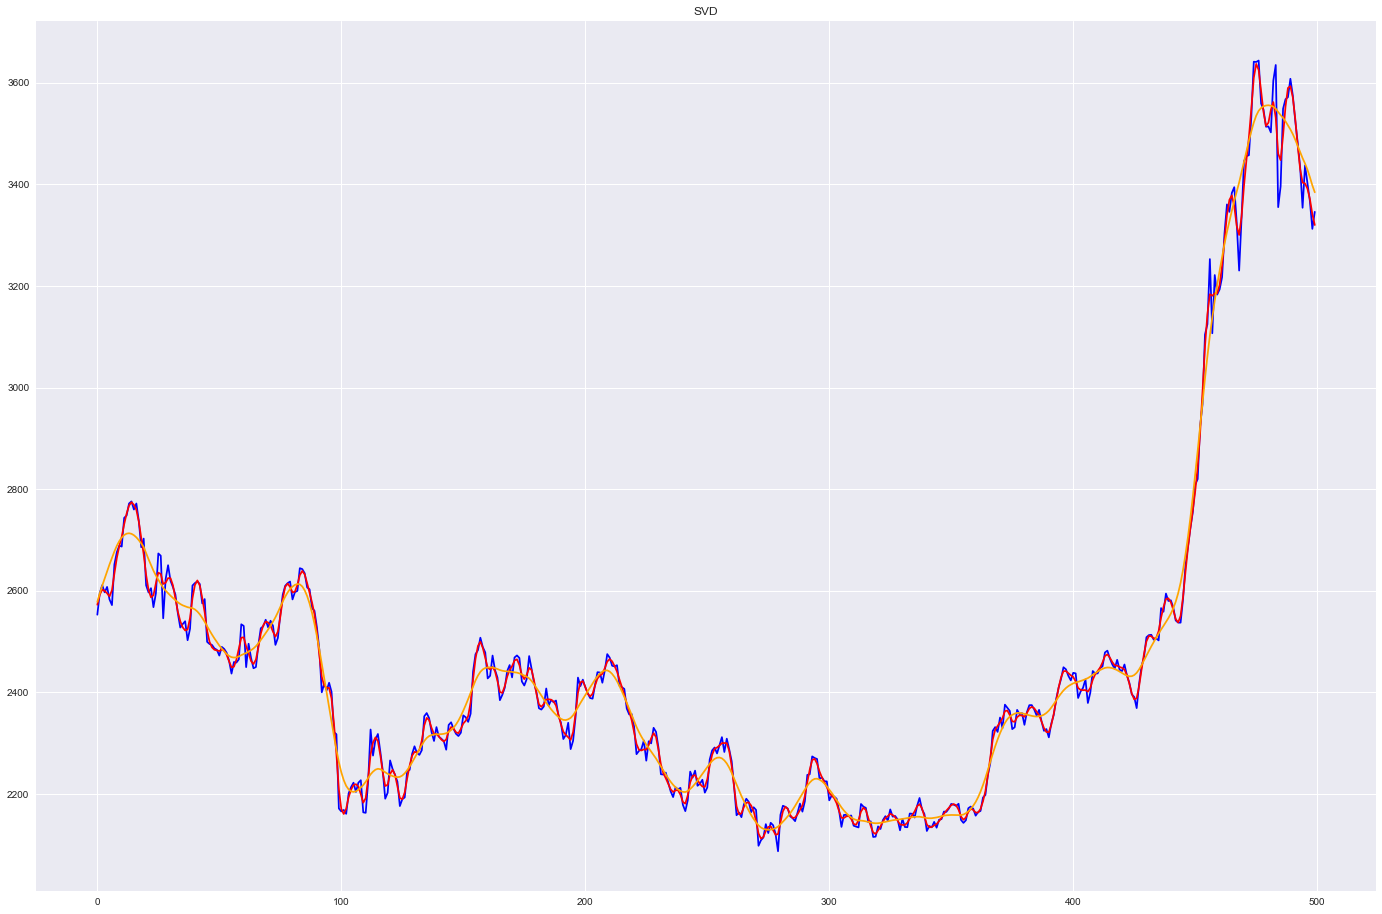

In [29]:
plt.figure(figsize=(24,16))
plt.plot(benchMarkClose[0:sampleNum].values, 'blue')
plt.plot(getSVD(benchMarkClose[0:sampleNum].values,sampleNum,5),'red')
#plt.plot(getSVD(benchMarkData[0:sampleNum].values,sampleNum,15),'green')
plt.plot(getSVD(benchMarkClose[0:sampleNum].values,sampleNum,20),'orange')
plt.title('SVD')

In [30]:
newDF=pd.DataFrame(index = benchMarkClose[0:sampleNum].index,data = None,columns =['SVD20','SVD5','PRICE'],dtype=float)

In [31]:
newDF['SVD20'] = getSVD(benchMarkClose[0:sampleNum].values,sampleNum,20)
newDF['SVD5'] = getSVD(benchMarkClose[0:sampleNum].values,sampleNum,5)
newDF ['PRICE'] = benchMarkClose[0:sampleNum].values

In [32]:
newDF['DIFF'] = newDF['SVD5'] - newDF['SVD20']
newDF['Price_change'] = newDF['PRICE'].diff()
newDF
upAccuracy = []
downAccuracy = []
for i in range(1,len(newDF)):
    if (newDF.iloc[i]['DIFF'] > 0) & (newDF.iloc[i-1]['DIFF'] < 0) & (newDF.iloc[i]['Price_change'] > 0) :
        upAccuracy.append(1)
    if (newDF.iloc[i]['DIFF'] < 0) & (newDF.iloc[i-1]['DIFF'] > 0) & (newDF.iloc[i]['Price_change'] < 0) :
        downAccuracy.append(-1)
a,b = len(upAccuracy)/len(newDF[newDF['Price_change']>0]), len(downAccuracy)/len(newDF[newDF['Price_change']<0])

In [33]:
newDF[newDF['Price_change']>0]

,SVD20,SVD5,PRICE,DIFF,Price_change
LZ_GPA_INDXQUOTE_CLOSE-d,,,,,
2013-01-18,2594.744590,2592.088289,2595.439,-2.656302,42.681
2013-01-21,2609.785309,2602.036808,2610.898,-7.748501,15.459
2013-01-23,2638.108807,2594.905982,2607.456,-43.202825,10.558
2013-01-28,2677.301200,2633.795799,2651.863,-43.505401,80.189
2013-01-29,2688.547174,2664.696581,2675.866,-23.850593,24.003
2013-01-30,2697.629026,2687.981895,2688.711,-9.647130,12.845
2013-02-01,2709.546395,2730.688981,2743.324,21.142586,56.442
2013-02-04,2712.342849,2751.736240,2748.028,39.393391,4.704
2013-02-05,2713.131312,2767.688145,2771.675,54.556833,23.647


In [34]:
m=7
t=15
dateList = benchMarkOpen.index
assetSSA = []
assetMA = []
holdingFlag = False
tradinglogSSA ={}
tradinglogMA ={}
portfolioValue ={i:0 for i in benchMarkClose.index[:t]}
ma_strategy = {i:0 for i in benchMarkClose.index[:t]}
for i in range(t,len(benchMarkClose)):
    todayDate = dateList[i]
    yesterDayDate = dateList[i-1]
    svdSignal = benchMarkClose.values[:i][-t:]
    #print len(svdSignal)
    newTS = getSVD(svdSignal,t,m)
    #print newTS
    #ma = benchMarkClose.iloc[:i].rolling(m,min_periods =1).mean()
    if len(assetSSA) !=0 and benchMarkClose[i-2] > newTS[-2] and benchMarkClose[i-1] < newTS[-1]: # sell signal
        sellprice = benchMarkOpen[i]
        #holdingFlag = False
        tradinglogSSA[todayDate] = (sellprice,-1)
        portfolioValue[todayDate] = (sellprice - assetSSA[0])/assetSSA[0] + portfolioValue[yesterDayDate]
        assetSSA = []
    elif len(assetSSA) == 0 and benchMarkClose[i-2] < newTS[-2] and benchMarkClose[i-1] > newTS[-1]: # buy signal
        buyprice = benchMarkOpen[i]
        assetSSA.append(buyprice)
        tradinglogSSA[todayDate] = (buyprice,1)
        #holdingFlag = True
        portfolioValue[todayDate] = portfolioValue[yesterDayDate]
    else:
        portfolioValue[todayDate] = portfolioValue[yesterDayDate]
    

In [35]:
for i in range(t,len(benchMarkClose)):
    todayDate = dateList[i]
    yesterDayDate = dateList[i-1]
    ma = benchMarkClose.iloc[:i].rolling(m,min_periods =1).mean()
### For MA strategy    
    if  len(assetMA) !=0 and benchMarkClose[i-2] > ma.iloc[-2] and benchMarkClose[i-1] < ma.iloc[-1]: # sell signal
        #print 1
        sellprice = benchMarkOpen[i]
        #holdingFlag = False
        tradinglogMA[todayDate] = (sellprice,-1)
        ma_strategy[todayDate] = ( sellprice - assetMA[0])/assetMA[0] + ma_strategy[yesterDayDate]
        assetMA = []
    elif len(assetMA) == 0 and benchMarkClose[i-2] < ma.iloc[-2] and benchMarkClose[i-1] > ma.iloc[-1]: # buy signal
        #print -1
        buyprice = benchMarkOpen[i]
        assetMA.append(buyprice)
        tradinglogMA[todayDate] = (buyprice,1)
        #holdingFlag = True
        ma_strategy[todayDate] = ma_strategy[yesterDayDate]
    else:
        ma_strategy[todayDate] = ma_strategy[yesterDayDate]
    #print i , assetMA,sellprice

In [36]:
 ma_strategy

{Timestamp('2013-01-17 00:00:00'): 0,
 Timestamp('2013-01-18 00:00:00'): 0,
 Timestamp('2013-01-21 00:00:00'): 0,
 Timestamp('2013-01-22 00:00:00'): 0,
 Timestamp('2013-01-23 00:00:00'): 0,
 Timestamp('2013-01-24 00:00:00'): 0,
 Timestamp('2013-01-25 00:00:00'): 0,
 Timestamp('2013-01-28 00:00:00'): 0,
 Timestamp('2013-01-29 00:00:00'): 0,
 Timestamp('2013-01-30 00:00:00'): 0,
 Timestamp('2013-01-31 00:00:00'): 0,
 Timestamp('2013-02-01 00:00:00'): 0,
 Timestamp('2013-02-04 00:00:00'): 0,
 Timestamp('2013-02-05 00:00:00'): 0,
 Timestamp('2013-02-06 00:00:00'): 0,
 Timestamp('2013-02-07 00:00:00'): 0,
 Timestamp('2013-02-08 00:00:00'): 0,
 Timestamp('2013-02-18 00:00:00'): 0,
 Timestamp('2013-02-19 00:00:00'): 0,
 Timestamp('2013-02-20 00:00:00'): 0,
 Timestamp('2013-02-21 00:00:00'): 0,
 Timestamp('2013-02-22 00:00:00'): 0,
 Timestamp('2013-02-25 00:00:00'): 0,
 Timestamp('2013-02-26 00:00:00'): 0,
 Timestamp('2013-02-27 00:00:00'): 0,
 Timestamp('2013-02-28 00:00:00'): 0,
 Timestamp('

In [37]:
portfolioValue

{Timestamp('2013-01-17 00:00:00'): 0,
 Timestamp('2013-01-18 00:00:00'): 0,
 Timestamp('2013-01-21 00:00:00'): 0,
 Timestamp('2013-01-22 00:00:00'): 0,
 Timestamp('2013-01-23 00:00:00'): 0,
 Timestamp('2013-01-24 00:00:00'): 0,
 Timestamp('2013-01-25 00:00:00'): 0,
 Timestamp('2013-01-28 00:00:00'): 0,
 Timestamp('2013-01-29 00:00:00'): 0,
 Timestamp('2013-01-30 00:00:00'): 0,
 Timestamp('2013-01-31 00:00:00'): 0,
 Timestamp('2013-02-01 00:00:00'): 0,
 Timestamp('2013-02-04 00:00:00'): 0,
 Timestamp('2013-02-05 00:00:00'): 0,
 Timestamp('2013-02-06 00:00:00'): 0,
 Timestamp('2013-02-07 00:00:00'): 0,
 Timestamp('2013-02-08 00:00:00'): 0,
 Timestamp('2013-02-18 00:00:00'): 0,
 Timestamp('2013-02-19 00:00:00'): 0,
 Timestamp('2013-02-20 00:00:00'): 0,
 Timestamp('2013-02-21 00:00:00'): 0,
 Timestamp('2013-02-22 00:00:00'): -0.025447530235549666,
 Timestamp('2013-02-25 00:00:00'): -0.025447530235549666,
 Timestamp('2013-02-26 00:00:00'): -0.025447530235549666,
 Timestamp('2013-02-27 00:00

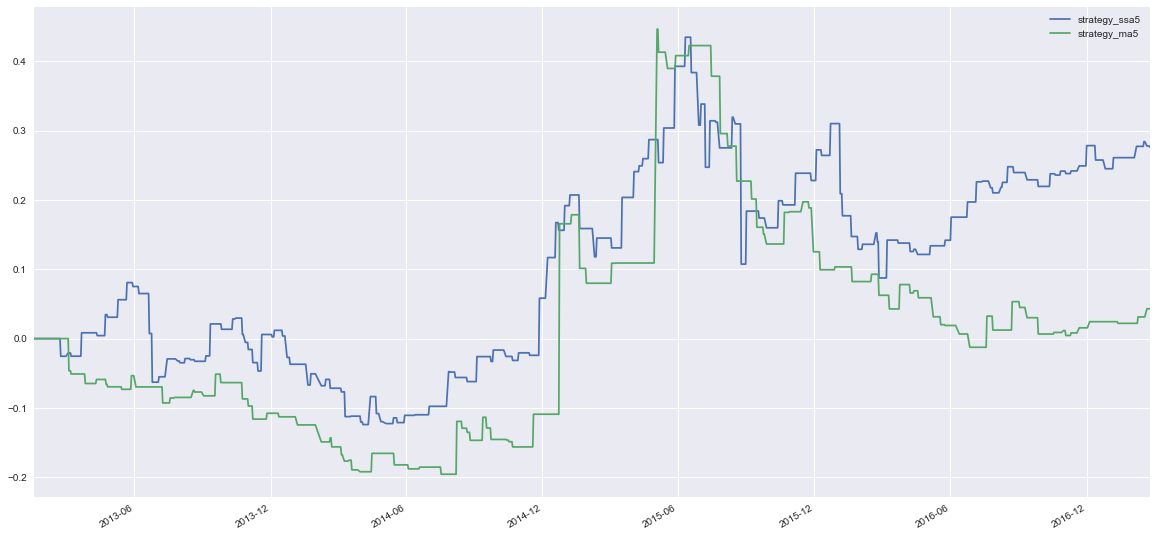

In [38]:
strategy_cmp = pd.DataFrame() 
strategy_cmp['strategy_ssa5'] = pd.Series(portfolioValue)
strategy_cmp['strategy_ma5'] = pd.Series(ma_strategy)
strategy_cmp.plot(figsize=(20,10))

In [39]:
benchMarkOpen.rolling(m,min_periods =1).mean()

LZ_GPA_INDXQUOTE_OPEN-d
2013-01-17    2570.711000
2013-01-18    2569.701500
2013-01-21    2581.684000
2013-01-22    2588.861000
2013-01-23    2588.728400
2013-01-24    2591.678167
2013-01-25    2590.135714
2013-01-28    2591.072286
2013-01-29    2603.455857
2013-01-30    2613.853571
2013-01-31    2625.362000
2013-02-01    2638.074714
2013-02-04    2659.112000
2013-02-05    2680.119000
2013-02-06    2707.924857
2013-02-07    2724.518143
2013-02-08    2735.549000
2013-02-18    2748.851000
2013-02-19    2757.116429
2013-02-20    2747.460000
2013-02-21    2740.004429
2013-02-22    2716.539000
2013-02-25    2693.056000
2013-02-26    2669.016857
2013-02-27    2639.299857
2013-02-28    2621.713429
2013-03-01    2619.677571
2013-03-04    2611.631714
2013-03-05    2603.095000
2013-03-06    2607.055143
                 ...     
2017-01-09    3333.583857
2017-01-10    3342.812914
2017-01-11    3350.413129
2017-01-12    3353.089171
2017-01-13    3349.861300
2017-01-16    3342.119943
2017-01-17    

In [40]:
tb.MACD(benchMarkOpen.values)

(array([             nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
         -6.93766253e+00,  -1.26528463e+01,  -1.96970974e+01,
         -2.37171107e+01,  -2.72062709e+01,  -3.11201226e+01,
         -3.22705862e+01,  -2.60545155e+01,  -2.08335310e+01,
         -1.52171982e+01,  -1.27529351e+01,  -1.27699719e+01,
         -1.58077760e+01,  -2.06565881e+01,  -2.55247047e+01,
        